# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#install joypy using 'pip install joypy'
import joypy

In [2]:
df = pd.read_csv("London_Bike_DataSet.csv")

In [3]:
df.shape

(17414, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.3 MB


In [7]:
import datetime as dt
df['month'] = df.timestamp.dt.month
df['days_in_week'] = df.timestamp.dt.weekday
df['hours_in_day'] = df.timestamp.dt.hour
df = df[['timestamp','month','days_in_week','hours_in_day','cnt','t1','t2','hum','wind_speed',
         'weather_code','is_holiday','is_weekend','season']]
df.head()

,timestamp,month,days_in_week,hours_in_day,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,1,6,0,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,1,6,1,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,1,6,2,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,1,6,3,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,1,6,4,47,2.0,0.0,93.0,6.5,1,0,1,3


# Section 1: Summary Statistics

In [8]:
df[['cnt','t1','t2','hum','wind_speed']].describe()

,cnt,t1,t2,hum,wind_speed
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063
std,1085.108068,5.571818,6.615145,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [9]:
df.mode(numeric_only=True)

,month,days_in_week,hours_in_day,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,5,0,16,46,13.0,13.0,88.0,12.0,1,0,0,0


In [10]:
df[['t1','t2']].corr()

,t1,t2
t1,1.000000,0.988344
t2,0.988344,1.000000


In [11]:
df['is_holiday'].value_counts().rename({0:'Non Holiday',1:'Holiday'})

Non Holiday    17030
Holiday          384
Name: is_holiday, dtype: int64

In [12]:
df['is_weekend'].value_counts().rename({0:'Non Weekend',1:'Weekend'})

Non Weekend    12444
Weekend         4970
Name: is_weekend, dtype: int64

In [13]:
df['weather_code'].value_counts().rename({1:'Sky Clear or Mostly Clear',2:'Scattered or Few Clouds',
                                                     3:'Broken Clouds',4:'Cloudy',7:'Rain',10:'Rain with thunderstorm',
                                                     26:'Snowfall',94:'Freezin fog'})

Sky Clear or Mostly Clear    6150
Scattered or Few Clouds      4034
Broken Clouds                3551
Rain                         2141
Cloudy                       1464
Snowfall                       60
Rain with thunderstorm         14
Name: weather_code, dtype: int64

In [14]:
df['season'].value_counts().rename({0:'Spring',1:'Summer',2:'Autumn',3:'Winter'})

Spring    4394
Summer    4387
Winter    4330
Autumn    4303
Name: season, dtype: int64

# Section 2: Visualization

# Bar Graph (Lean Wei Liang)

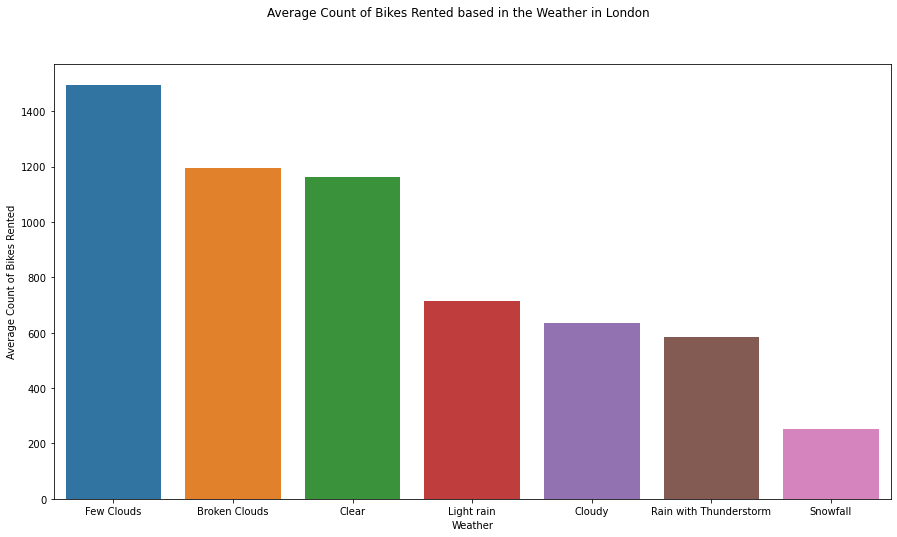

In [15]:
#Design by Lean Wei Liang
#Display bar graph, average of count of bikes rented against weather
df_weather=df.groupby(['weather_code']).mean()
df_weather=df_weather.sort_values('cnt',ascending=False)
weather_name={1:'Clear',2:'Few Clouds',3:'Broken Clouds',4:'Cloudy',7:'Light rain',10:'Rain with Thunderstorm',26:'Snowfall'
             ,94:'Freezing Fog'}
df_weather=df_weather.rename(index=weather_name)
plt.figure(figsize=(15,8))
sns.barplot(data=df_weather,x=df_weather.index,y='cnt')
plt.suptitle("Average Count of Bikes Rented based in the Weather in London")
plt.xlabel("Weather")
plt.ylabel("Average Count of Bikes Rented")
plt.show()

#  Correlation Matrix Plot, Heatmap(Lean Wei Liang)

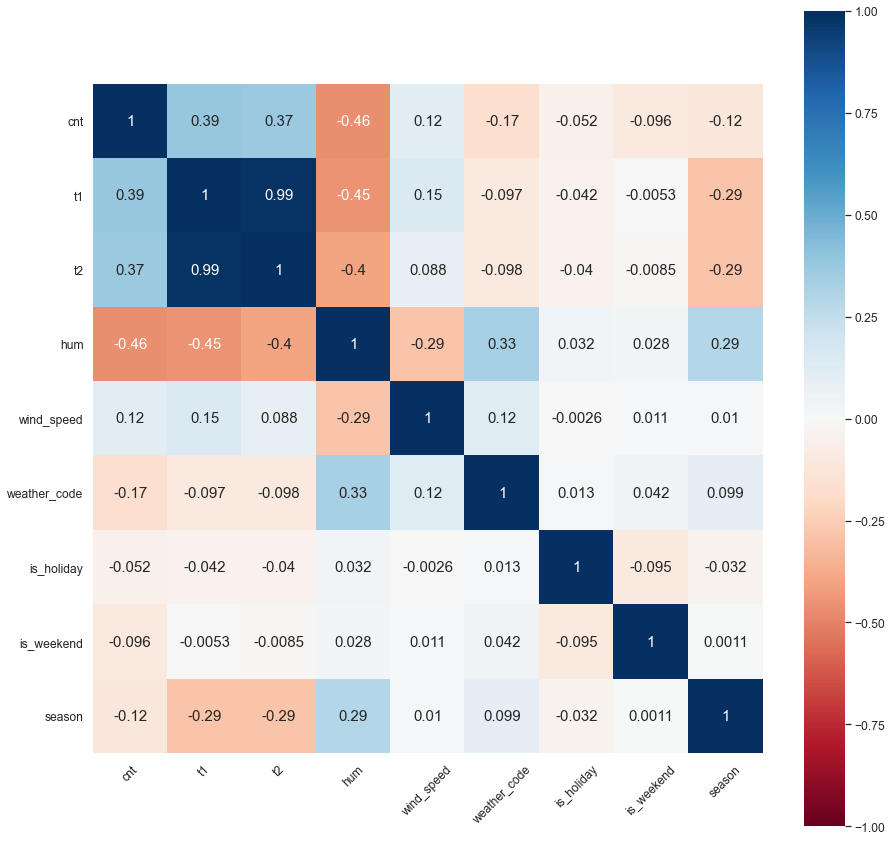

In [16]:
#Design by Lean Wei Liang
#Display correlation matrix plot of all attributes except timestamp
plt.figure(figsize=(15,15))
sns.set(font_scale=1.1)
ax = sns.heatmap(
    df[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']].corr(), vmin=-1,
    vmax=1, center=0, cmap="RdBu", square=True, annot=True, annot_kws={"size":15}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='center'
);
plt.show()

#  Point Plot (Seow Kai Sheng)

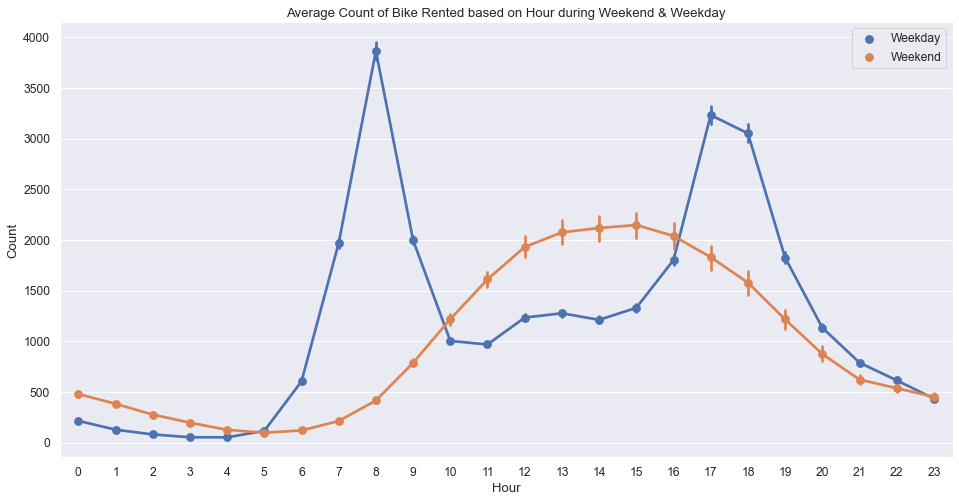

In [17]:
#Design by Seow Kai Sheng
#set figure size
plt.figure(figsize=(16,8))

#Pointplot 
ax = sns.pointplot(data=df, x='hours_in_day', y='cnt', hue='is_weekend')

#Set figure title
ax.set_title('Average Count of Bike Rented based on Hour during Weekend & Weekday')

#Change axis label
ax.set(xlabel='Hour', ylabel='Count')

#Change legend label
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ['Weekday', 'Weekend'])

plt.show()

#  Line Plot (Seow Kai Sheng)

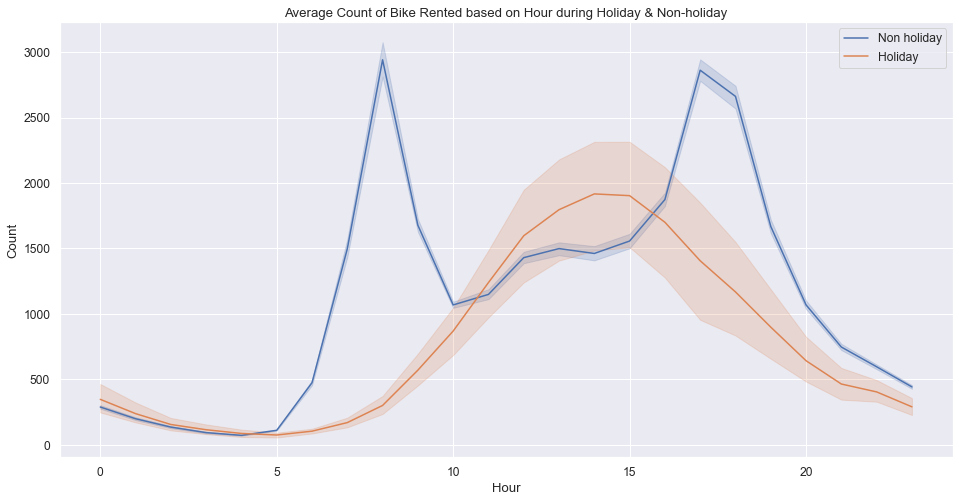

In [18]:
#Design by Seow Kai Sheng
#set figure size
plt.figure(figsize=(16,8))

#Lineplot
ax = sns.lineplot(data=df,x='hours_in_day',y='cnt',hue='is_holiday')

#Set figure title
ax.set_title('Average Count of Bike Rented based on Hour during Holiday & Non-holiday')

#Change axis label
ax.set(xlabel='Hour', ylabel='Count')

#Change legend label
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ['Non holiday', 'Holiday'])

plt.show()

#  Box Plot + Strip Plot (Tan Yuan Jie)

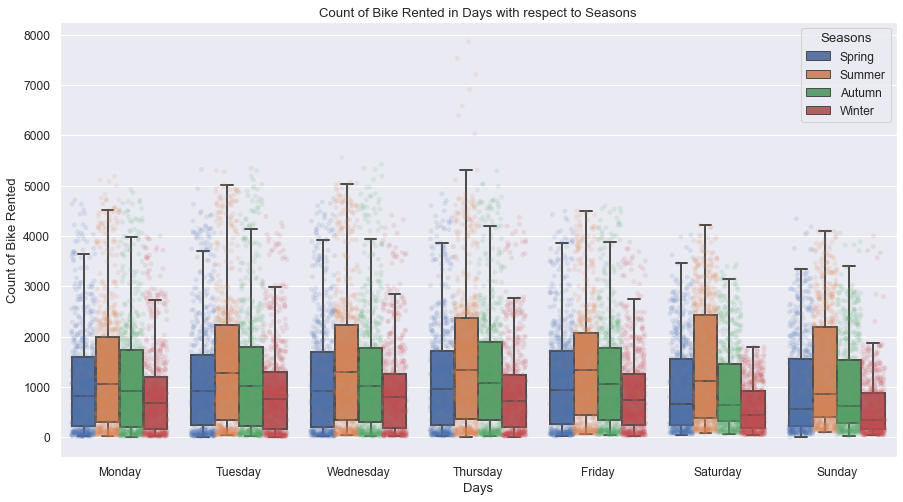

In [19]:
#Design by Tan Yuan Jie
#BoxPlot with StripPlot
plt.figure(figsize=(15,8))
stripplot = sns.stripplot(x='days_in_week', y='cnt', data=df, jitter=0.4, hue='season', alpha=0.12, dodge=True)
boxplot = sns.boxplot(x='days_in_week', y='cnt', hue='season',data=df, fliersize=0,linewidth=2, dodge=True)
labels=['Spring','Summer','Autumn','Winter']
h, l = boxplot.get_legend_handles_labels()
plt.legend(h, labels,title='Seasons')
plt.title('Count of Bike Rented in Days with respect to Seasons')
plt.xlabel('Days')
plt.ylabel('Count of Bike Rented')
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

#  Ridgeline Plot / JoyPlot (Tan Yuan Jie)

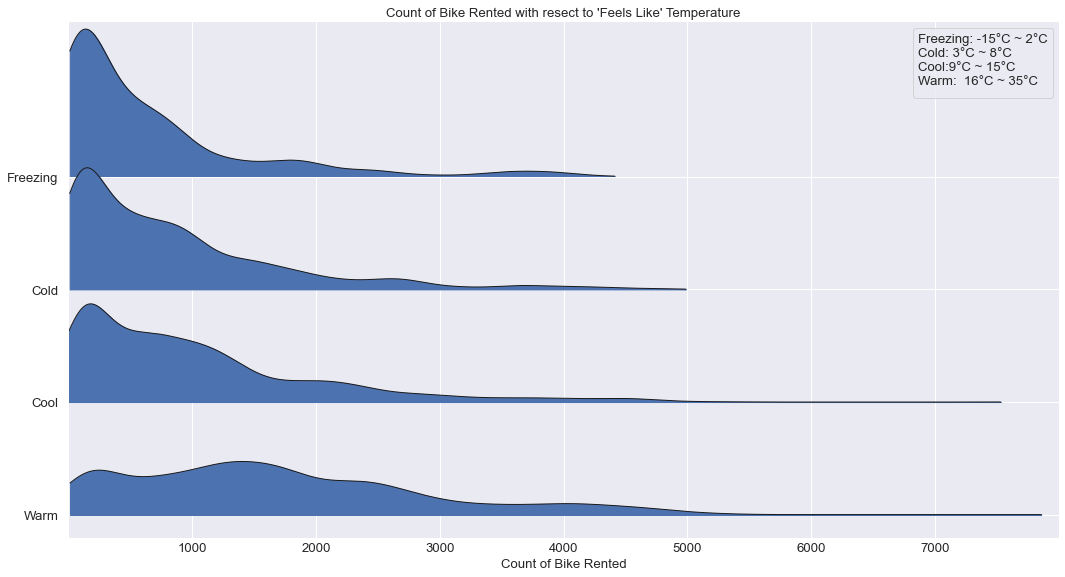

In [20]:
#Design by Tan Yuan Jie
#Ridgeline Plot / JoyPlot
labels = ['Freezing', 'Cold', 'Cool', 'Warm']
t_cat = pd.cut(df['t2'], bins=[-15,2,8,15,35], labels=labels)
df_copy = df.copy()
df_copy['t2'] = t_cat
joyplot = df_copy.groupby('t2')
joypy.joyplot(joyplot, by='t2', column='cnt', linewidth=1, figsize=(15,8), grid=True, x_range=[0,8000],
                          title='Count of Bike Rented with resect to \'Feels Like\' Temperature', 
                          range_style='own', tails=0)
plt.xlabel('Count of Bike Rented')
plt.legend(labels='', title='Freezing: -15°C ~ 2°C\nCold: 3°C ~ 8°C\nCool:9°C ~ 15°C\nWarm:  16°C ~ 35°C')
plt.show()